<b><font size="5">Assignment: Riju Sathyan</b>

<b><font size="3">Real-world scenario</b>
The project uses the following data sets to demonstrate the various learnings throughout the course.

<table style="width:100%">
    <tr>
        <td style="text-align:left;width:25%"><b>Source Description</b></td>
        <td style="text-align:left;width:20%"><b>Source/File Name</b></td>    
        <td style="text-align:left;width:55%"><b>Source Link</b></td>        
    </tr>
    <tr>
        <td style="text-align:left">EPL Results 1993-2018</td>
        <td style="text-align:left">EPL_Set.csv</td>            
        <td style="text-align:left">https://www.kaggle.com/code/mathchi/diagnostic-a-patient-has-diabetes/data</td>        
    </tr>    
    <tr>
        <td style="text-align:left">Premier League Standings 22 Seasons</td>
        <td style="text-align:left">EPL_standings_2000-2022.csv</td>
        <td style="text-align:left">https://www.kaggle.com/datasets/quadeer15sh/premier-league-standings-11-seasons-20102021</td>     
    </tr>
    <tr>
        <td style="text-align:left">Champion League History - UK Teams</td>
        <td style="text-align:left">Wiki page table</td>             
        <td style="text-align:left">https://en.wikipedia.org/wiki/English_football_clubs_in_international_competitions</td>     
    </tr>
    <tr>
        <td style="text-align:left">Diabetes Data</td>
        <td style="text-align:left">diabetes.csv</td>            
        <td style="text-align:left;word-wrap: break-word;">https://www.kaggle.com/code/mmilovanovic87/quarter-century-champion-of-premier-league/data</td>        
    </tr>    
</table>

<b><font size="3">Importing Data: Web Scraping & Analysing Data</b>

In [1]:
import requests
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns

# This Wiki sourced dataset is being used to validate the information in the other dataset.

url = 'https://en.wikipedia.org/wiki/English_football_clubs_in_international_competitions'
page = requests.get(url)
df_wiki = pd.read_html(url)
df_wiki[3] #Check the correct table from Wiki Page is being picked up 

,Season,Club,Progress,Score,Opponents,Venue(s)
0,1955–56,None entered,None entered,None entered,None entered,None entered
1,1956–57,Manchester United,Semi-finals,3–5,Real Madrid,1–3 at Santiago Bernabéu2–2 at Old Trafford
2,1957–58,Manchester United,Semi-finals,2–5,Milan,2–1 at Old Trafford0–4 at San Siro
3,1958–59,Manchester United,First round,NaN,Young Boys,Walkover – United withdrawn by the Football Le...
4,1958–59,Wolverhampton Wanderers,First round,3–4,Schalke 04,2–2 at Molineux1–2 at Glückauf-Kampfbahn
...,...,...,...,...,...,...
139,2020–21,Chelsea,Winners,1–0,Manchester City,Estádio do Dragão
140,2021–22,Manchester United,Round of 16,1–2,Atlético Madrid,1–1 at Wanda Metropolitano0–1 at Old Trafford
141,2021–22,Chelsea,Quarter-finals,4–5 (a.e.t.),Real Madrid,1–3 at Stamford Bridge3–2 at Santiago Bernabéu
142,2021–22,Manchester City,Semi-finals,5–6 (a.e.t.),Real Madrid,4–3 at Etihad Stadium1–3 at Santiago Bernabéu


In [2]:
df_wiki[3][['Season','Club']].info() # Only Season & Club of relevance for this exercise

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  144 non-null    object
 1   Club    144 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [3]:
#Create new dataframe to check for referential integrity of Season column
df_SeasonsCL = pd.DataFrame(df_wiki[3]['Season'],  columns=['Season'])
df_SeasonsCL['Season'] = df_SeasonsCL['Season'].str.replace('–','-')

#Use Regex to check for inconsistent text formats 
df_SeasonsCL['DQ_Season'] = df_SeasonsCL['Season'].str.contains(r'\d\d\d\d\-\d\d$', regex=True)

print(df_SeasonsCL.loc[df_SeasonsCL['DQ_Season'] == False])

        Season  DQ_Season
42  1990-91[a]      False
53   1999-2000      False
54   1999-2000      False
55   1999-2000      False


In [4]:
#Update incorrectly formatted values
df_SeasonsCL.loc[42,['Season']] = '1990-91'
df_SeasonsCL.loc[53,['Season']] = '1999-00'
df_SeasonsCL.loc[54,['Season']] = '1999-00'
df_SeasonsCL.loc[55,['Season']] = '1999-00'

In [5]:
#Create a dataframe with CL season unique values, sort columns and then create a PL (qualification) season
# ie this seasons CL entrants qualified from last seasons Premier League final standings.
df_seasons =  pd.DataFrame(df_SeasonsCL['Season'].unique(), columns=['CL Season'])
df_seasons.rename({'CL Season': 'Season CL'}, axis=1, inplace=True)
df_seasons.sort_values(by=['Season CL'])
df_seasons['Season PL']= df_seasons.shift(1) #shift rows, so create one season qualification lag

#Create a CL Season to Premier League (PL) qualification mapping dictionary & 
sm_d={}

# Iterate over column names & create dictionary
for i,j in df_seasons.iterrows():
   sm_d[df_seasons['Season CL'][i]] = df_seasons['Season PL'][i]

In [6]:
# Create new data frame with Season & Club
zipped = list(zip(df_SeasonsCL['Season'], df_wiki[3]['Club']))
df_English_teams_qualified =  pd.DataFrame(zipped, columns=['Season','Club'])
df_English_teams_qualified.rename({'Season': 'Season CL'}, axis=1, inplace=True)

df_English_teams_qualified['Season PLq'] = ''

# Iterate over Champions League Season and add appropriate Premier League Qualification season 
for i,j in  df_English_teams_qualified.iterrows():
    df_English_teams_qualified['Season PLq'][i] = sm_d[df_English_teams_qualified['Season CL'][i]]

df_English_teams_qualified.drop('Season CL', axis=1, inplace=True)
df_English_teams_qualified.tail(99)

,Club,Season PLq
45,Manchester United,1992-93
46,Manchester United,1993-94
47,Blackburn Rovers,1994-95
48,Manchester United,1995-96
49,Newcastle United,1996-97
...,...,...
139,Chelsea,2019-20
140,Manchester United,2020-21
141,Chelsea,2020-21
142,Manchester City,2020-21


<b><font size="3">Importing Data: Import CSV & Analysing Data</b>

In [7]:
#Import League data from csv
df_EPLs = pd.read_csv("datasets/EPL_standings_2000-2022.csv")
df_EPLs = df_EPLs[~df_EPLs['Season'].isin(['2021-22'])]

#Convert text field to Boolean for Champion League qualification usgin regex
df_EPLs['CLQ_chk'] = df_EPLs['Qualification or relegation'].str.contains(r'(?=.*[Qq]ualification)(?=.*Champions League)', regex=True)
df_EPLs

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,CLQ_chk
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,True
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,True
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,True
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],False
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-21,16,Brighton & Hove Albion,38,9,14,15,40,46,-6,41,Not Applicable,False
416,2020-21,17,Burnley,38,10,9,19,33,55,-22,39,Not Applicable,False
417,2020-21,18,Fulham,38,5,13,20,27,53,-26,28,Relegation to the EFL Championship,False
418,2020-21,19,West Bromwich Albion,38,5,11,22,35,76,-41,26,Relegation to the EFL Championship,False


In [8]:
df_ETQ_Teams_Unique = pd.DataFrame(df_English_teams_qualified['Club'].unique(), columns=['Original_ETQ_Name'])
df_EPLs_Teams_Unique = pd.DataFrame(df_EPLs['Team'].unique(), columns=['Original_EPLs_Name'])
df_ETQ_Teams_Unique

,Original_ETQ_Name
0,None entered
1,Manchester United
2,Wolverhampton Wanderers
3,Burnley
4,Tottenham Hotspur
5,Ipswich Town
6,Everton
7,Liverpool
8,Manchester City
9,Leeds United


In [9]:
df_Team_Names_Map = pd.merge(df_EPLs_Teams_Unique, df_ETQ_Teams_Unique, left_on=['Original_EPLs_Name'], right_on=['Original_ETQ_Name'], how='right')
df_Team_Names_Map['Match_chk'] = np.where((df_Team_Names_Map['Original_EPLs_Name'] == df_Team_Names_Map['Original_ETQ_Name']), True, False)
df_Team_Names_Map 

,Original_EPLs_Name,Original_ETQ_Name,Match_chk
0,NaN,None entered,False
1,Manchester United,Manchester United,True
2,Wolverhampton Wanderers,Wolverhampton Wanderers,True
3,Burnley,Burnley,True
4,Tottenham Hotspur,Tottenham Hotspur,True
5,Ipswich Town,Ipswich Town,True
6,Everton,Everton,True
7,Liverpool,Liverpool,True
8,Manchester City,Manchester City,True
9,Leeds United,Leeds United,True


In [10]:
df_final_table = pd.merge(df_EPLs, df_English_teams_qualified, left_on=['Season','Team'], right_on=['Season PLq','Club'], how='left')
df_final_table.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,CLQ_chk,Club,Season PLq
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,True,Manchester United,2000-01
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,True,Arsenal,2000-01
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,True,Liverpool,2000-01
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],False,NaN,NaN
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],False,NaN,NaN


In [11]:
# Validate the Champions league qualification is the same from both underlying data sources
print("Unmatched Team Names: ", df_final_table.loc[(df_final_table['Club'].isna()) & (df_final_table['CLQ_chk'] == True)].shape[0])

Unmatched Team Names:  0


In [12]:
df_final_table.drop(['Club','Season PLq', 'Qualification or relegation'], axis=1, inplace=True)
df_final_table.rename({'CLQ_chk': 'CL Qualified'}, axis=1, inplace=True)
df_final_table.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,CL Qualified
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,True
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,True
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,True
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,False
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,False


In [13]:
df_final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        420 non-null    object
 1   Pos           420 non-null    int64 
 2   Team          420 non-null    object
 3   Pld           420 non-null    int64 
 4   W             420 non-null    int64 
 5   D             420 non-null    int64 
 6   L             420 non-null    int64 
 7   GF            420 non-null    int64 
 8   GA            420 non-null    int64 
 9   GD            420 non-null    int64 
 10  Pts           420 non-null    int64 
 11  CL Qualified  420 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 39.8+ KB


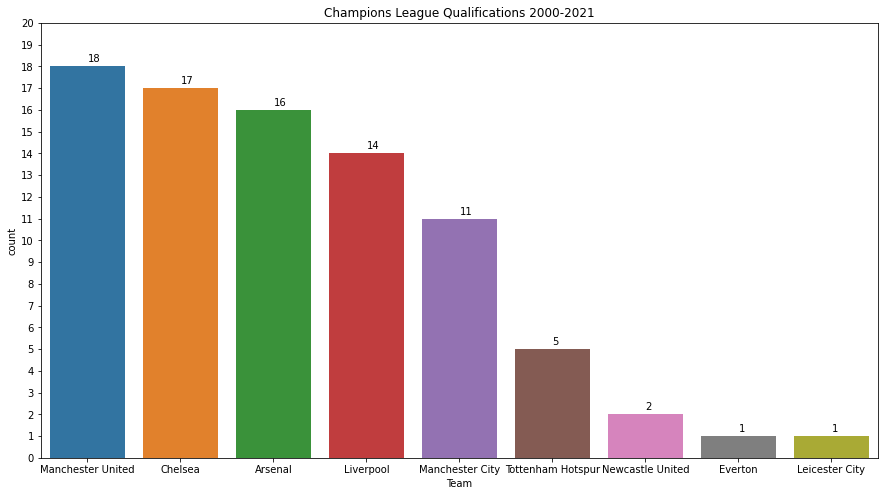

In [14]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x=df_final_table[df_final_table['CL Qualified'] == True]['Team'],
                   order=df_final_table[df_final_table['CL Qualified'] == True]['Team'].value_counts().index)
ax.set(title='Champions League Qualifications 2000-2021')
ax.set_yticks(range(21))

for p in ax.patches:
    height = p.get_height() # get the height of each bar
     
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals

In [15]:
def get_teams():
    '''This function accesses the df_final_table and returns stats all the Team names (alphabetically), 
that played in the Premier League between 2000-2021.
'''
    
    df_teams_unique = df_final_table['Team'].unique()
    df_teams_unique = np.sort(df_teams_unique)
    return df_teams_unique

def get_history(my_team):
    '''This function accesses the df_final_table and returns stats on Champions League qualification between 2000-2021..  
Pass in the team name as the parameter.  The returned results will be in the form of a tuple, and contain:

(i) Team name
(ii) Seasons where team qualified 
(iii) Seasons where team did not qualify 
(iv) To seasons in Premier League over the period of the dataset
(v) Lowest points to achieve qualification
(vi) Highest points when team did not qualify
'''
    
    df_qualified = df_final_table[(df_final_table['CL Qualified'] == True) & (df_final_table['Team'] == my_team)]
    qualified = df_qualified.shape[0]
    qualified_min_points = df_qualified['Pts'].min() 
    
    df_dnq = df_final_table[(df_final_table['CL Qualified'] == False) & (df_final_table['Team'] == my_team)]
    dnq = df_dnq.shape[0]    
    dnq_max_points = df_dnq['Pts'].max() 
    
    total_seasons = qualified + dnq
    return (my_team, qualified, dnq, total_seasons, qualified_min_points, dnq_max_points)

In [16]:
print(get_history.__doc__)

This function accesses the df_final_table and returns stats on Champions League qualification between 2000-2021..  
Pass in the team name as the parameter.  The returned results will be in the form of a tuple, and contain:

(i) Team name
(ii) Seasons where team qualified 
(iii) Seasons where team did not qualify 
(iv) To seasons in Premier League over the period of the dataset
(v) Lowest points to achieve qualification
(vi) Highest points when team did not qualify



In [17]:
all_teams = get_teams()

In [18]:
for x in all_teams[0:9]:
    print(get_history(x))

('Arsenal', 16, 5, 21, 67, 75)
('Aston Villa', 0, 18, 18, nan, 64)
('Birmingham City', 0, 7, 7, nan, 50)
('Blackburn Rovers', 0, 11, 11, nan, 63)
('Blackpool', 0, 1, 1, nan, 39)
('Bolton Wanderers', 0, 11, 11, nan, 58)
('Bournemouth', 0, 5, 5, nan, 46)
('Bradford City', 0, 1, 1, nan, 26)
('Brighton & Hove Albion', 0, 4, 4, nan, 41)


<b><font size="3">Machine Learning</b>

In [ ]:
#